In [276]:
import pandas
import matplotlib.pyplot as plt
import requests
import os
from urllib.parse import urlencode
import numpy as np

In [ ]:
import os
import subprocess

# Source the .bash_profile and update the current environment variables
command = "source ~/.bash_profile && env"
proc = subprocess.Popen(command stdout=subprocess.PIPE, shell=True executable='/bin/bash')
for line in proc.stdout:
    key _ value = line.decode().partition("=")
    os.environ[key.strip()] = value.strip()
proc.communicate();


In [103]:
# read in Software Use Questionnaire - 2024 (Responses).xlsx with Pandas
df = pandas.read_excel('Software Use Questionnaire - 2024 (Responses).xlsx')

In [ ]:
from collections import Counter

packages = []
for pp in df['6. If you are a python user what are the 3-5 packages you use the most?'].values:
    if pp and pp != 'nan' and pp != 'N/A' and isinstance(pp str):
        pp = pp.replace(' '',')
        pp = pp.replace('/',',')
        pp = pp.replace(' and ',',')
        tmp_pp = pp.strip().split(',')
        for p in tmp_pp:
            if p:
                packages.append(p.strip().lower())

package_counts = Counter(packages)
package_counts = dict(sorted(package_counts.items(), key=lambda x: x[1], reverse=True))

In [105]:
package_counts

{'numpy': 516,
 'matplotlib': 444,
 'astropy': 410,
 'scipy': 316,
 'pandas': 188,
 'pytorch': 23,
 'h5py': 21,
 'emcee': 21,
 'scikit-learn': 20,
 'photutils': 15,
 'jax': 13,
 'tensorflow': 12,
 'numba': 9,
 'healpy': 9,
 'jwst': 9,
 'os': 9,
 'sklearn': 9,
 'seaborn': 7,
 'astroquery': 7,
 'specutils': 6,
 'pytest': 5,
 'keras': 4,
 'requests': 4,
 'pickle': 4,
 'dask': 4,
 'plotly': 4,
 'torch': 4,
 'gala': 4,
 'sys': 4,
 'galsim': 4,
 'panda': 4,
 'jupyter': 4,
 'sympy': 4,
 'and': 4,
 'pypeit': 4,
 'yt': 4,
 'scikit': 3,
 ';': 3,
 'bokeh': 3,
 'galpy': 3,
 'math': 3,
 'opencv': 3,
 'fits': 3,
 'casa': 3,
 'sunpy': 3,
 'hcipy': 3,
 'cupy': 3,
 'rebound': 3,
 'fitsio': 3,
 'lightkurve': 3,
 'lmfit': 3,
 'bilby': 2,
 'corner': 2,
 'numpyro': 2,
 'uncertainties': 2,
 'pyccl': 2,
 'numoy': 2,
 'nbodykit': 2,
 'scikit-image': 2,
 'stingray': 2,
 'sep': 2,
 'pycbc': 2,
 'camb': 2,
 'iminuit': 2,
 'lsst': 2,
 'swiftsimio': 2,
 'statsmodels': 2,
 'pymc': 2,
 'pygad': 2,
 'ppxf': 2,
 'astr

In [403]:
print(list(package_counts.items())[:20])

[('numpy', 516), ('matplotlib', 444), ('astropy', 410), ('scipy', 316), ('pandas', 188), ('pytorch', 23), ('h5py', 21), ('emcee', 21), ('scikit-learn', 20), ('photutils', 15), ('jax', 13), ('tensorflow', 12), ('numba', 9), ('healpy', 9), ('jwst', 9), ('os', 9), ('sklearn', 9), ('seaborn', 7), ('astroquery', 7), ('specutils', 6)]


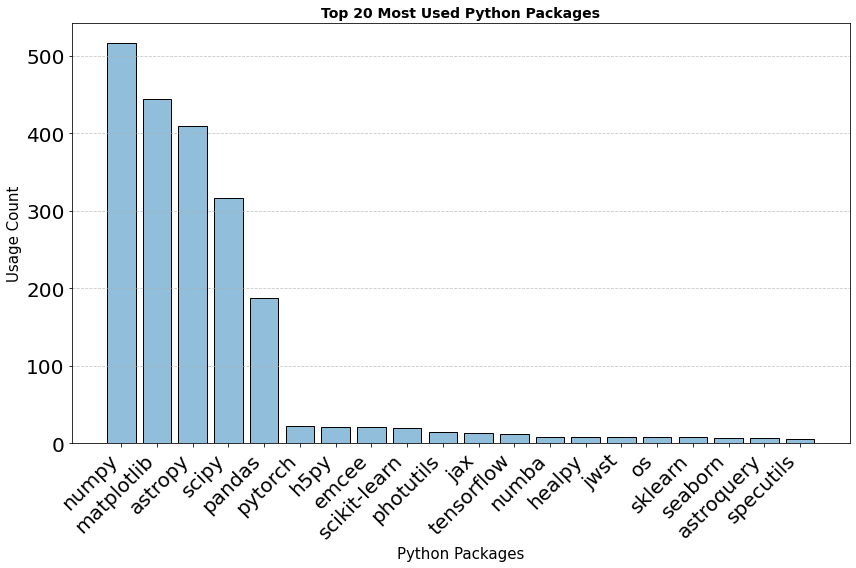

In [331]:
# Extract the top 20 packages and their counts
top_packages = list(package_counts.items())[:20]
packages, counts = zip(*top_packages)

# Create the histogram
plt.figure(figsize=(12, 8))
plt.bar(packages, counts, color='#91bfdb', edgecolor='black')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the x-axis and y-axis labels
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Python Packages', fontsize=15)
plt.ylabel('Usage Count', fontsize=15)

# Add a title with a larger font size
plt.title('Top 20 Most Used Python Packages', fontsize=14, fontweight='bold')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()

The most common packages:

Numpy: started as `numeric` in 1995, renamed to numpy in 2006

Matplotlib: initial release in 2003

Astropy: 2011?

Scipy: initial release in 2001

Pandas: initeal release in 2008

Other packages specific to astronomy:

Emcee: initial release in 2015

Photutils: initial release in 2014

Astroquery: initial release in 2018



In [109]:
# import the requests package and set your token in a variable for later use

token = os.getenv('ADS_TOKEN')


In [110]:
libs = ['numpy', 'matplotlib', 'astropy', 'scipy', 'pandas', ]
colors = ['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4'] # extra colors '#ffffbf', '#e0f3f8', 

In [111]:
astro_libs = ['emcee','photutils','astroquery','jwst','iraf']
#colors = 

In [335]:
data = [] 

try:
    output_df = pandas.read_csv('all_citations_by_lib.csv')
except:
    for year in range(2011, 2025):
        for lib in ['numpy', 'scipy', 'matplotlib', 'pandas', 'astropy']:
            encoded_query = urlencode({"q": "ack:'{}' AND year:{}".format(lib, year),
                                    "fq": "property:refereed AND database:astronomy AND ((bibstem:'ApJ') OR (bibstem:'ApJL') OR (bibstem:'ApJS') OR bibstem:('AJ') OR bibstem:('MNRAS') OR bibstem:('A&A') OR bibstem:('PhRvD') OR bibstem:('GeoRL'))",
                                    "fl": "bibcode"
                                    })
            results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                headers={'Authorization': 'Bearer ' + token})
            num_found = results.json()['response']['numFound']
            data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Where':'ack'})

            encoded_query = urlencode({"q": "body:'{}' AND year:{}".format(lib, year),
                                "fq": "property:refereed AND database:astronomy AND ((bibstem:'ApJ') OR (bibstem:'ApJL') OR (bibstem:'ApJS') OR bibstem:('AJ') OR bibstem:('MNRAS') OR bibstem:('A&A') OR bibstem:('PhRvD') OR bibstem:('GeoRL'))",
                                "fl": "bibcode"
                                    })
            results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                headers={'Authorization': 'Bearer ' + token})
            num_found = results.json()['response']['numFound']
            data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Where':'body'})

            encoded_query = urlencode({"q": "body:'{}' AND ack:'{}' AND year:{}".format(lib, lib, year),
                                "fq": "property:refereed AND database:astronomy AND ((bibstem:'ApJ') OR (bibstem:'ApJL') OR (bibstem:'ApJS') OR bibstem:('AJ') OR bibstem:('MNRAS') OR bibstem:('A&A') OR bibstem:('PhRvD') OR bibstem:('GeoRL'))",
                                "fl": "bibcode"
                                    })
            results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                headers={'Authorization': 'Bearer ' + token})
            data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Where':'both'})

    # Convert the data to a DataFrame
    output_df = pandas.DataFrame(data)
    output_df.to_csv('all_citations_by_lib.csv', index=False)


In [336]:
output_df

,Year,Library,Count,Where
0,2011,numpy,2,ack
1,2011,numpy,8,body
2,2011,numpy,8,both
3,2011,scipy,3,ack
4,2011,scipy,16,body
...,...,...,...,...
205,2024,pandas,170,body
206,2024,pandas,170,both
207,2024,astropy,1998,ack
208,2024,astropy,986,body


numpy [np.int64(8), np.int64(16), np.int64(36), np.int64(43), np.int64(48), np.int64(52), np.int64(80), np.int64(121), np.int64(184), np.int64(190), np.int64(349), np.int64(372), np.int64(413), np.int64(657)]
scipy [np.int64(16), np.int64(36), np.int64(53), np.int64(55), np.int64(117), np.int64(142), np.int64(187), np.int64(293), np.int64(414), np.int64(546), np.int64(736), np.int64(826), np.int64(909), np.int64(1335)]
matplotlib [np.int64(5), np.int64(12), np.int64(20), np.int64(27), np.int64(32), np.int64(38), np.int64(48), np.int64(69), np.int64(103), np.int64(142), np.int64(240), np.int64(272), np.int64(336), np.int64(552)]
pandas [np.int64(13), np.int64(15), np.int64(28), np.int64(39), np.int64(33), np.int64(45), np.int64(34), np.int64(52), np.int64(42), np.int64(70), np.int64(95), np.int64(114), np.int64(107), np.int64(170)]
astropy [np.int64(0), np.int64(0), np.int64(2), np.int64(7), np.int64(35), np.int64(56), np.int64(97), np.int64(175), np.int64(295), np.int64(365), np.int64(

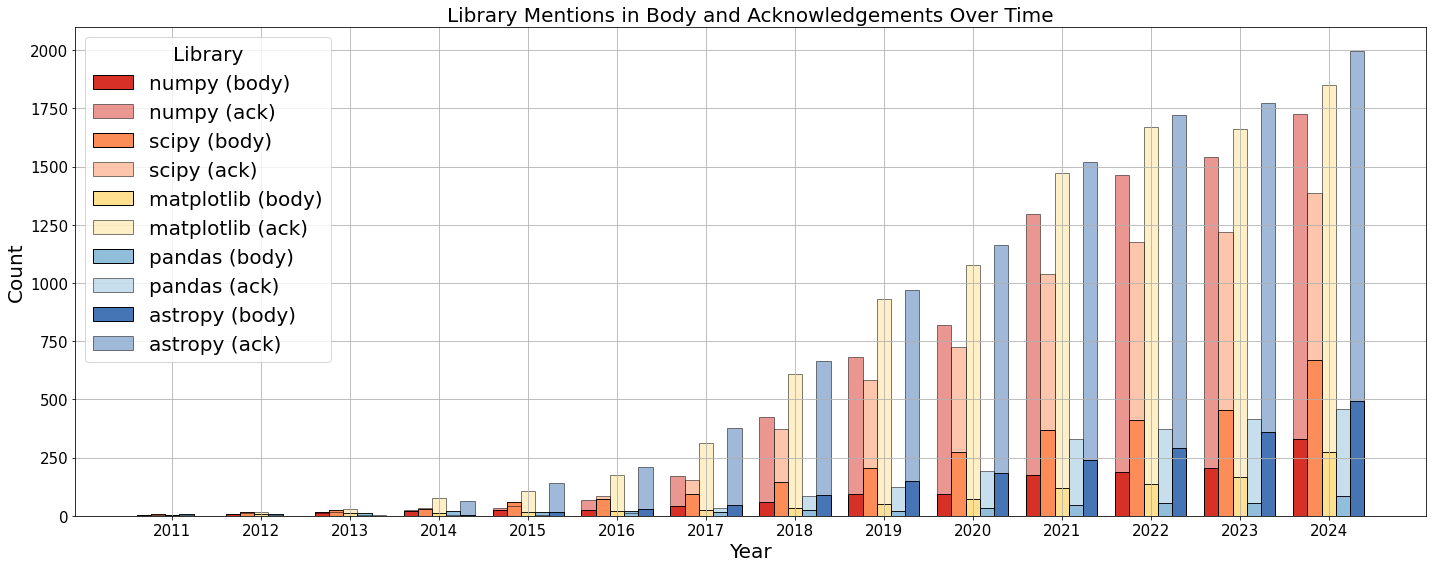

In [343]:
# Plot the data
plt.figure(figsize=(20, 8))

# Prepare data for the histogram
libraries = output_df['Library'].unique()
years = sorted(output_df['Year'].unique())
ack_counts = []
body_counts = []
both_counts = []

for library in libraries:
    ack_data = output_df[(output_df['Library'] == library) & (output_df['Where'] == 'ack')].set_index('Year')['Count']
    body_data = output_df[(output_df['Library'] == library) & (output_df['Where'] == 'body')].set_index('Year')['Count']
    both_data = output_df[(output_df['Library'] == library) & (output_df['Where'] == 'both')].set_index('Year')['Count']
    ack_counts.append([ack_data.get(year, 0)-both_data.get(year, 0)/2 for year in years])
    body_counts.append([body_data.get(year, 0)-both_data.get(year, 0)/2 for year in years])
    both_counts.append([both_data.get(year, 0) for year in years])
    print(library, [both_data.get(year, 0) for year in years])

# Plot the histogram
bar_width = 0.8 / len(libraries)  # Adjust bar width based on the number of libraries
x = range(len(years))

for i, (library, ack, body, both, color) in enumerate(zip(libraries, ack_counts, body_counts, both_counts, colors)):
    plt.bar([pos + i * bar_width for pos in x], body, bar_width, label=f'{library} (body)', color=color, edgecolor='black')
    plt.bar([pos + i * bar_width for pos in x], ack, bar_width, bottom=body, label=f'{library} (ack)', alpha=0.5, color=color, edgecolor='black')

# Set x-axis ticks and labels
plt.xticks([pos + (len(libraries) - 1) * bar_width / 2 for pos in x], years)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Library Mentions in Body and Acknowledgements Over Time', fontsize=20)
plt.legend(title='Library', loc='upper left', fontsize=20, title_fontsize=20)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

In [115]:
# TOTAL number of papers pubished per year per journal:

try:
    all_pubs_df = pandas.read_csv('all_pubs.csv')
except:
    data = []
    for year in range(2011, 2025):
        encoded_query = urlencode({"q": "year:{}".format(year),
                                "fq": "property:refereed AND database:astronomy",
                                "fl": "bibcode"})
        
        results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                headers={'Authorization': 'Bearer ' + token})
        num_found = results.json()['response']['numFound']
        data.append({'Year': year, 'Count': num_found})

    # Convert the data to a DataFrame
    all_pubs_df = pandas.DataFrame(data)
    print(all_pubs_df)
    all_pubs_df.to_csv('all_pubs.csv', index=False)

    Year  Count
0   2011  28028
1   2012  28434
2   2013  28353
3   2014  27622
4   2015  29369
5   2016  28773
6   2017  29760
7   2018  30465
8   2019  30509
9   2020  35196
10  2021  36946
11  2022  33530
12  2023  31869
13  2024  34818


In [ ]:
# TOTAL number of papers pubished per year per journal:

bibstems = ['ApJ','AJ','ApJS','ApJL','MNRAS','A&A','PhRvD','GeoRL']
try:
    total_pubs_df = pandas.read_csv('total_pubs.csv')
except:
    data = []
    for year in range(2011, 2025):
        for bib in bibstems:
            encoded_query = urlencode({"q": "year:{}".format(year),
                                    "fq": "property:refereed AND database:astronomy AND bibstem:{}".format(bib),
                                    "fl": "bibcode"})
            
            results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                headers={'Authorization': 'Bearer ' + token})
            num_found = results.json()['response']['numFound']
            data.append({'Year': year, 'Journal': bib, 'Count': num_found})

    # Convert the data to a DataFrame
    total_pubs_df = pandas.DataFrame(data)
    print(total_pubs_df)
    total_pubs_df.to_csv('total_pubs.csv', index=False)

     Year Journal  Count
0    2011     ApJ   2473
1    2011      AJ    402
2    2011    ApJS    182
3    2011    ApJL    747
4    2011   MNRAS   2400
..    ...     ...    ...
107  2024    ApJL    710
108  2024   MNRAS   3656
109  2024     A&A   3458
110  2024   PhRvD   2540
111  2024   GeoRL   1754

[112 rows x 3 columns]


In [118]:
bib_colors = ['#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac']
bib_colors.reverse()
print(bib_colors)

['#2166ac', '#4393c3', '#92c5de', '#d1e5f0', '#fddbc7', '#f4a582', '#d6604d', '#b2182b']


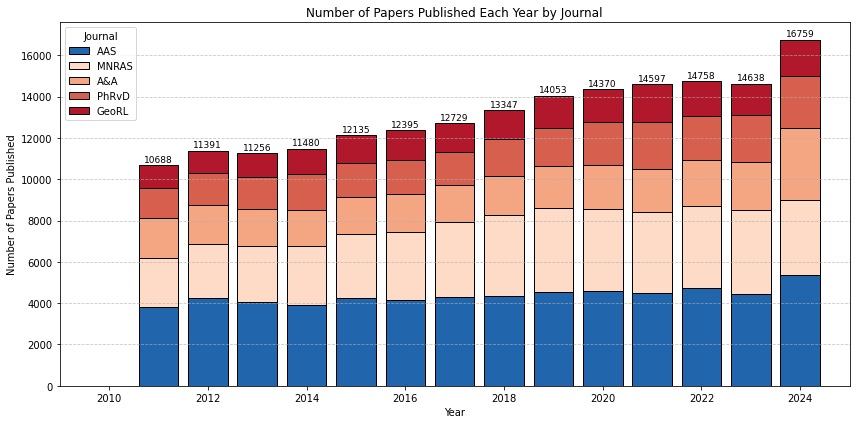

In [322]:
bibstems = ['AAS','MNRAS', 'A&A', 'PhRvD', 'GeoRL']
bib_colors = ['#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#2166ac']
bib_colors.reverse()

# Merge 'ApJ', 'AJ', 'ApJS', 'ApJL' into a single 'AAS' entry
aas_journals = ['ApJ', 'AJ', 'ApJS', 'ApJL']
tmp = total_pubs_df[total_pubs_df['Journal'].isin(aas_journals)].groupby(['Year']).agg({'Count': 'sum'}).reset_index()
tmp['Journal'] = 'AAS'
total_pubs_df = total_pubs_df[~total_pubs_df['Journal'].isin(aas_journals)]
total_pubs_df = pandas.concat([total_pubs_df, tmp], ignore_index=True)

stacked_data = []
# Create the histogram
plt.figure(figsize=(12, 6))
for journal, cc in zip(bibstems, bib_colors):
    journal_data = total_pubs_df[total_pubs_df['Journal'] == journal]
    if len(stacked_data) == 0:
        stacked_data = journal_data.set_index('Year')['Count']
    else:
        stacked_data += journal_data.set_index('Year')['Count']
    plt.bar(journal_data['Year'], journal_data['Count'], bottom=stacked_data - journal_data.set_index('Year')['Count'], label=journal, color=cc, edgecolor='black')

# Add total number of papers above each column
for year, total in stacked_data.items():
    plt.text(year, total + 50, str(total), ha='center', va='bottom', fontsize=9, color='black')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number of Papers Published')
plt.title('Number of Papers Published Each Year by Journal')
plt.xlim(2009, 2025)
plt.legend(title='Journal', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

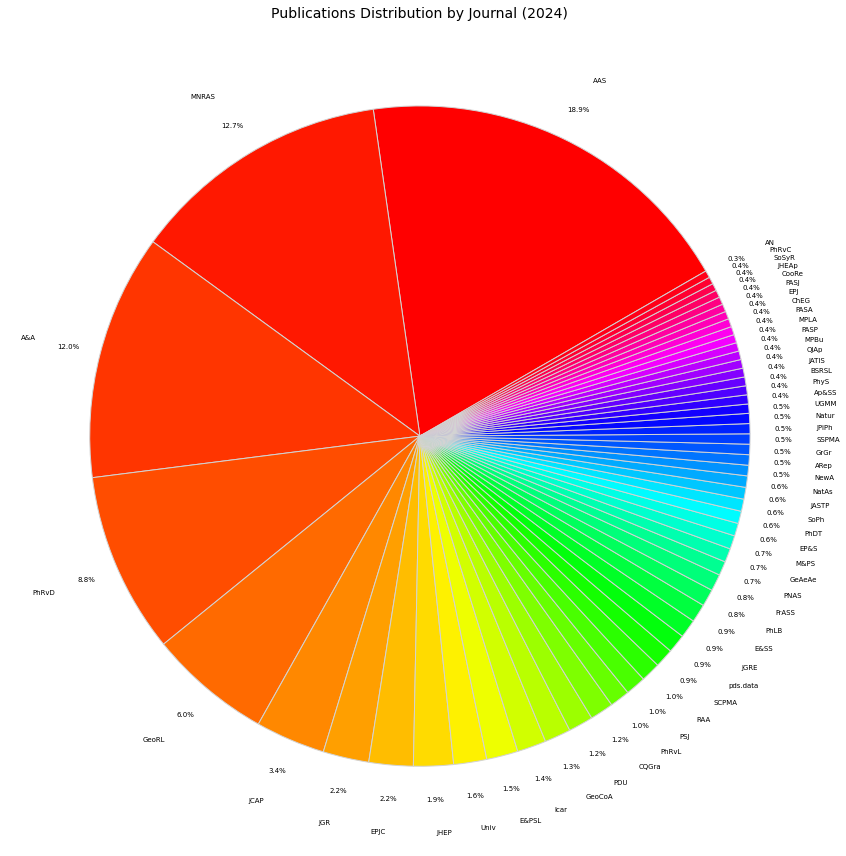

In [120]:
publications_dict_2024 = {
    "AAS": 3769+710+589+283,
    "MNRAS": 3600,
    "A&A": 3400,
    "PhRvD": 2500,
    "GeoRL": 1700,
    "JCAP": 965,
    #"ApJL": 710,
    "JGR": 635,
    "EPJC": 612,
    #"AJ": 589,
    "JHEP": 551,
    "Univ": 457,
    "E&PSL": 436,
    "Icar": 402,
    "GeoCoA": 364,
    "PDU": 343,
    "CQGra": 326,
    #"ApJS": 283,
    "PhRvL": 277,
    "PSJ": 281,
    "RAA": 271,
    "SCPMA": 261,
    "pds.data": 258,
    "JGRE": 256,
    "E&SS": 253,
    "PhLB": 237,
    "FrASS": 232,
    "PNAS": 195,
    "GeAeAe": 190,
    "M&PS": 187,
    "EP&S": 176,
    "PhDT": 171,
    "SoPh": 169,
    "JASTP": 163,
    "NatAs": 158,
    "NewA": 146,
    "ARep": 144,
    "GrGr": 144,
    "SSPMA": 142,
    "JPiPh": 140,
    "Natur": 140,
    "UGMM": 128,
    "Ap&SS": 126,
    "PhyS": 124,
    "BSRSL": 122,
    "JATIS": 122,
    "OJAp": 121,
    "MPBu": 119,
    "PASP": 118,
    "MPLA": 115,
    "PASA": 115,
    "ChEG": 113,
    "EPJ": 108,
    "PASJ": 107,
    "CooRe": 106,
    "JHEAp": 103,
    "SoSyR": 101,
    "PhRvC": 99,
    "AN": 98
}

colormap = plt.cm.hsv
numberOfSlices = len(publications_dict_2024)
sliceColors = colormap(np.linspace(0., 1., numberOfSlices))

# Prepare data for the pie chart
labels = list(publications_dict_2024.keys())
sizes = list(publications_dict_2024.values())

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30, textprops={'fontsize': 7}, pctdistance=1.1, labeldistance=1.2, colors=sliceColors, wedgeprops={'edgecolor': 'lightgray'})
plt.title('Publications Distribution by Journal (2024)', fontsize=14)
plt.tight_layout()
plt.show() 

[ 2400  1941  1433  1110  3804 17340] ['MNRAS', 'A&A', 'PhRvD', 'GeoRL', 'AAS', 'Other'] ['#2166ac', '#4393c3', '#92c5de', '#d1e5f0', '#fddbc7', '#f4a582', '#d6604d', '#b2182b', 'gray', 'gray', 'grey']


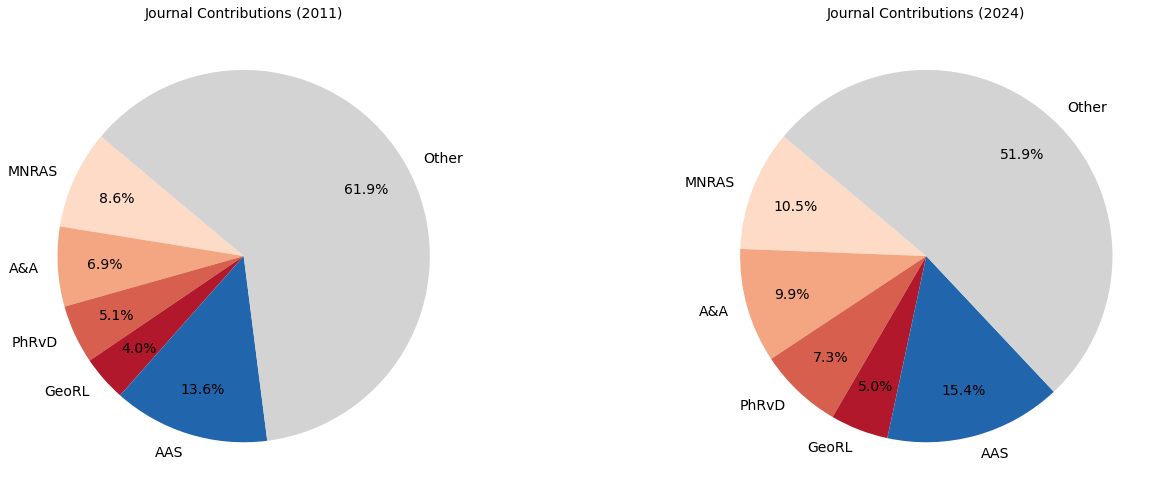

In [320]:
aas_journals = ['ApJ', 'AJ', 'ApJS', 'ApJL']
tmp = total_pubs_df[total_pubs_df['Journal'].isin(aas_journals)].groupby(['Year']).agg(
    {'Count': 'sum'}).reset_index()
tmp['Journal'] = 'AAS'
total_pubs_df = total_pubs_df[~total_pubs_df['Journal'].isin(aas_journals)]
total_pubs_df = pandas.concat([total_pubs_df, tmp], ignore_index=True)

pie_colors = ['#fddbc7','#f4a582','#d6604d','#b2182b','#2166ac', 'lightgray']

# Filter data for 2011 and 2023
data_2011 = total_pubs_df[total_pubs_df['Year'] == 2011]
data_2024 = total_pubs_df[total_pubs_df['Year'] == 2024]


# Prepare data for the pie charts
labels_2011 = data_2011['Journal'].to_list()
labels_2011.append('Other')
sizes_2011 = data_2011['Count'].to_numpy()
sizes_2011 = np.concatenate((sizes_2011, [28028 - sum(sizes_2011)]))
print(sizes_2011, labels_2011, bib_colors)
labels_2024 = data_2024['Journal'].to_list()
labels_2024.append('Other')
sizes_2024 = data_2024['Count']
sizes_2024 = np.concatenate((sizes_2024, [34829 - sum(sizes_2024)]))

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(21, 7))

# Pie chart for 2011
axes[0].pie(sizes_2011, labels=labels_2011, autopct='%1.1f%%', startangle=140, colors=pie_colors, textprops={'fontsize': 14}, pctdistance=0.75)
axes[0].set_title('Journal Contributions (2011)', fontsize=14)

# Pie chart for 2024
axes[1].pie(sizes_2024, labels=labels_2024, autopct='%1.1f%%', startangle=140, colors=pie_colors, textprops={'fontsize': 14}, pctdistance=0.75)
axes[1].set_title('Journal Contributions (2024)', fontsize=14)


plt.tight_layout()
plt.show()

In [122]:

try:
    bib_lib_df = pandas.read_csv('all_citations_by_lib_bib.csv')
except:
    data = [] 

    for year in range(2011, 2025):
        for lib in ['numpy', 'scipy', 'matplotlib', 'pandas', 'astropy']:
            for bib in bibstems:
                encoded_query = urlencode({"q": "ack:'{}' AND year:{}".format(lib, year),
                                        "fq": "property:refereed AND database:astronomy AND bibstem:{}".format(bib),
                                        "fl": "bibcode"
                                        })
                results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                    headers={'Authorization': 'Bearer ' + token})
                num_found = results.json()['response']['numFound']
                data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Journal':bib, 'Where':'ack'})

                encoded_query = urlencode({"q": "body:'{}' AND year:{}".format(lib, year),
                                    "fq": "property:refereed AND database:astronomy AND bibstem:{}".format(bib),
                                    "fl": "bibcode"
                                        })
                results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                    headers={'Authorization': 'Bearer ' + token})
                num_found = results.json()['response']['numFound']
                data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Journal':bib, 'Where':'body'})

                encoded_query = urlencode({"q": "body:'{}' AND ack:'{}' AND year:{}".format(lib, lib, year),
                                    "fq": "property:refereed AND database:astronomy AND bibstem:{}".format(bib),
                                    "fl": "bibcode"
                                        })
                results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                    headers={'Authorization': 'Bearer ' + token})
                num_found = results.json()['response']['numFound']
                data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Journal':bib, 'Where':'both'})

    # Convert the data to a DataFrame
    bib_lib_df = pandas.DataFrame(data)
    print(bib_lib_df)
    bib_lib_df.to_csv('all_citations_by_lib_bib.csv')


In [182]:
bib_lib_df[(bib_lib_df['Library'] == 'astropy') & (bib_lib_df['Year'] == 2024) & (bib_lib_df['Journal'] == 'ApJ')]

,Year,Library,Count,Journal,Where
1656,2024,astropy,823,ApJ,ack
1657,2024,astropy,203,ApJ,body
1658,2024,astropy,106,ApJ,both


In [123]:
# Group by Journal and Year, and calculate the desired output
grouped_df = bib_lib_df.groupby(['Journal', 'Year','Library']).apply(
    lambda group: group.loc[group['Where'] == 'body', 'Count'].sum() +
                  group.loc[group['Where'] == 'ack', 'Count'].sum() -
                  group.loc[group['Where'] == 'both', 'Count'].sum()
).reset_index(name='Adjusted_Count')
merged_df = grouped_df.merge(total_pubs_df, on=['Year', 'Journal'], suffixes=('', '_total'))
print(merged_df)

    Journal  Year     Library  Adjusted_Count  Count
0       A&A  2011     astropy               0   1941
1       A&A  2011  matplotlib               1   1941
2       A&A  2011       numpy               1   1941
3       A&A  2011      pandas               1   1941
4       A&A  2011       scipy               4   1941
..      ...   ...         ...             ...    ...
555   PhRvD  2024     astropy              17   2540
556   PhRvD  2024  matplotlib              44   2540
557   PhRvD  2024       numpy              35   2540
558   PhRvD  2024      pandas               7   2540
559   PhRvD  2024       scipy              68   2540

[560 rows x 5 columns]


/var/folders/hv/3h478c1n4mj5d4ktzyh_v_sh3cf0hx/T/ipykernel_937/3064486114.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = bib_lib_df.groupby(['Journal', 'Year','Library']).apply(


In [124]:
# Group the AAS journals
aas_journals = ['ApJ', 'AJ', 'ApJS', 'ApJL']
aas_group = merged_df[merged_df['Journal'].isin(aas_journals)].groupby(['Year', 'Library']).agg(
    {'Adjusted_Count': 'sum', 'Count': 'sum'}).reset_index()

# Add the new AAS entry to the merged_df
aas_group['Journal'] = 'AAS'
merged_df = pandas.concat([merged_df, aas_group], ignore_index=True)

print(merged_df)

    Journal  Year     Library  Adjusted_Count  Count
0       A&A  2011     astropy               0   1941
1       A&A  2011  matplotlib               1   1941
2       A&A  2011       numpy               1   1941
3       A&A  2011      pandas               1   1941
4       A&A  2011       scipy               4   1941
..      ...   ...         ...             ...    ...
625     AAS  2024     astropy            1372   5351
626     AAS  2024  matplotlib            1075   5351
627     AAS  2024       numpy            1072   5351
628     AAS  2024      pandas             311   5351
629     AAS  2024       scipy            1020   5351

[630 rows x 5 columns]


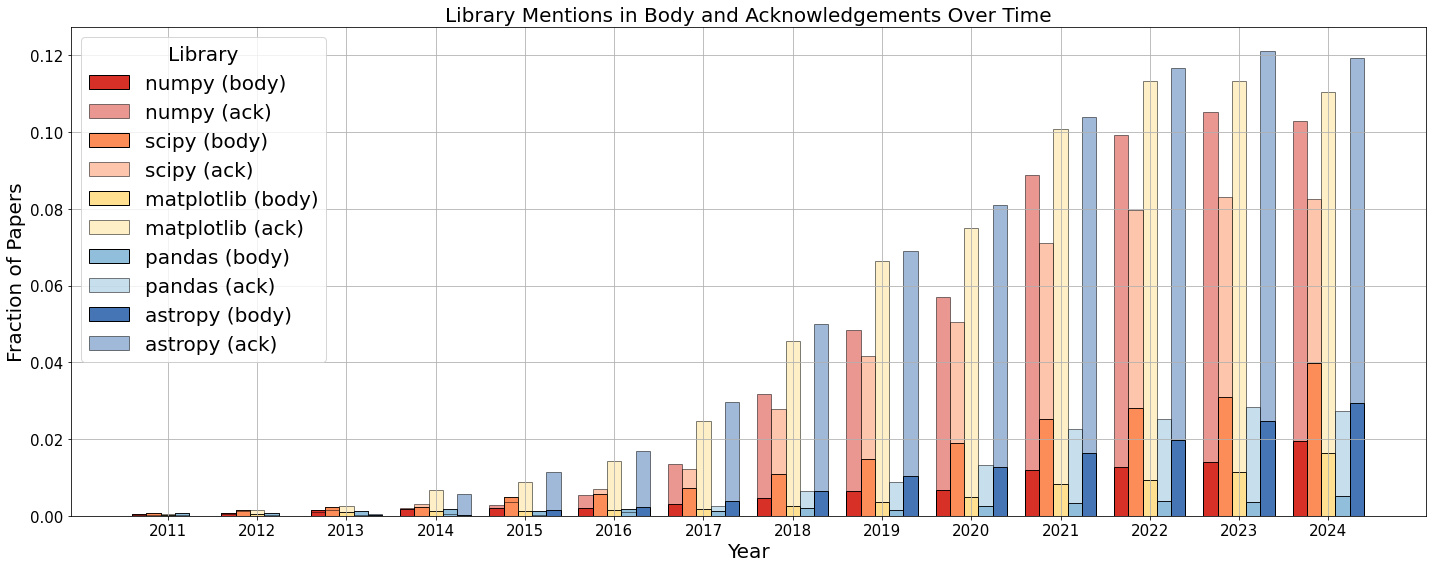

In [402]:
# Plot the data
plt.figure(figsize=(20, 8))

# Prepare data for the histogram
libraries = output_df['Library'].unique()
years = sorted(output_df['Year'].unique())
ack_counts = []
body_counts = []
both_counts = []

for library in libraries:
    ack_data = output_df[(output_df['Library'] == library) & (output_df['Where'] == 'ack')].set_index('Year')['Count']/total_pubs_df.groupby('Year')['Count'].sum()
    body_data = output_df[(output_df['Library'] == library) & (output_df['Where'] == 'body')].set_index('Year')['Count']/total_pubs_df.groupby('Year')['Count'].sum()
    both_data = output_df[(output_df['Library'] == library) & (output_df['Where'] == 'both')].set_index('Year')['Count']/total_pubs_df.groupby('Year')['Count'].sum()
    ack_counts.append([ack_data.get(year, 0)-both_data.get(year, 0)/2 for year in years])
    body_counts.append([body_data.get(year, 0)-both_data.get(year, 0)/2 for year in years])
    both_counts.append([both_data.get(year, 0) for year in years])

# Plot the histogram
bar_width = 0.8 / len(libraries)  # Adjust bar width based on the number of libraries
x = range(len(years))

for i, (library, ack, body, both, color) in enumerate(zip(libraries, ack_counts, body_counts, both_counts, colors)):
    plt.bar([pos + i * bar_width for pos in x], body, bar_width, label=f'{library} (body)', color=color, edgecolor='black')
    plt.bar([pos + i * bar_width for pos in x], ack, bar_width, bottom=body, label=f'{library} (ack)', alpha=0.5, color=color, edgecolor='black')

# Set x-axis ticks and labels
plt.xticks([pos + (len(libraries) - 1) * bar_width / 2 for pos in x], years)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=20)
plt.ylabel('Fraction of Papers', fontsize=20)
plt.title('Library Mentions in Body and Acknowledgements Over Time', fontsize=20)
plt.legend(title='Library', loc='upper left', fontsize=20, title_fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/hv/3h478c1n4mj5d4ktzyh_v_sh3cf0hx/T/ipykernel_937/2645057915.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lib_data['Fraction'] = lib_data['Adjusted_Count'] / lib_data['Count']
/var/folders/hv/3h478c1n4mj5d4ktzyh_v_sh3cf0hx/T/ipykernel_937/2645057915.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lib_data['Fraction'] = lib_data['Adjusted_Count'] / lib_data['Count']


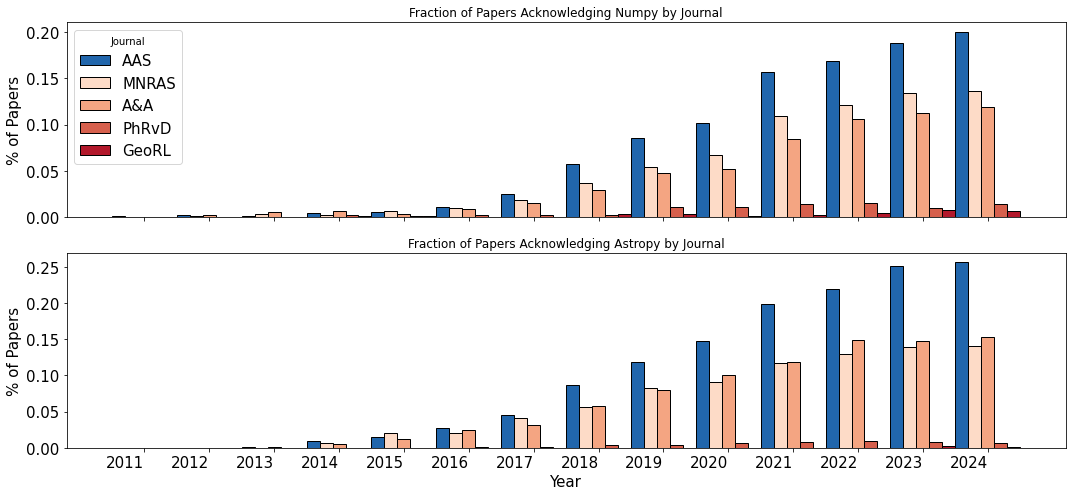

In [359]:
# Create a figure with subplots for each library
#fig, axes = plt.subplots(len(libs), 1, figsize=(15, 4 * len(libs)), sharex=True)
fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True)


offsets = [-0.4, -0.2, 0, 0.2, 0.4]

bibstems_short = ['AAS', 'MNRAS', 'A&A', 'PhRvD', 'GeoRL']
bib_colors_short = ['#b2182b','#d6604d','#f4a582','#fddbc7','#2166ac']
bib_colors_short.reverse()
#for ax, lib in zip(axes, libs):
for ax, lib in zip(axes, ['numpy','astropy']):
    # Filter data for the current library
    lib_data = merged_df[merged_df['Library'] == lib]
    lib_data['Fraction'] = lib_data['Adjusted_Count'] / lib_data['Count']

    for off, journal, cc in zip(offsets, bibstems_short, bib_colors_short):
        ax.bar(lib_data[lib_data['Journal'] == journal]['Year'] + off, 
               lib_data[lib_data['Journal'] == journal]['Fraction'], 
               width=0.2, label=journal, color=cc, edgecolor='black')

    # plot a dotted line at x=2015.5 and z=2018.5
    #ax.axvline(x=2015.5, color='gray', linestyle=':', linewidth=1)
    #ax.axvline(x=2018.5, color='gray', linestyle=':', linewidth=1)

    # Set labels and title for each subplot
    ax.set_ylabel(f'% of Papers', fontsize=15)
    ax.set_title(f'Fraction of Papers Acknowledging {lib.capitalize()} by Journal')
    if ax == axes[0]:
        ax.legend(title='Journal', loc='upper left', fontsize=15)
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=0, ha='right', fontsize=15)
    ax.tick_params(axis='y', labelsize=15)

# Set common x-axis label
axes[-1].set_xlabel('Year', fontsize=15)

plt.tight_layout()
plt.show()

/var/folders/hv/3h478c1n4mj5d4ktzyh_v_sh3cf0hx/T/ipykernel_937/738633583.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  journal_data[journal_data['Where'] == 'body']['Count'] = journal_data[journal_data['Where'] == 'body']['Count'] - journal_data[journal_data['Where'] == 'both']['Count']
/var/folders/hv/3h478c1n4mj5d4ktzyh_v_sh3cf0hx/T/ipykernel_937/738633583.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  journal_data[journal_data['Where'] == 'body']['Count'] = journal_data[journal_data['Where']

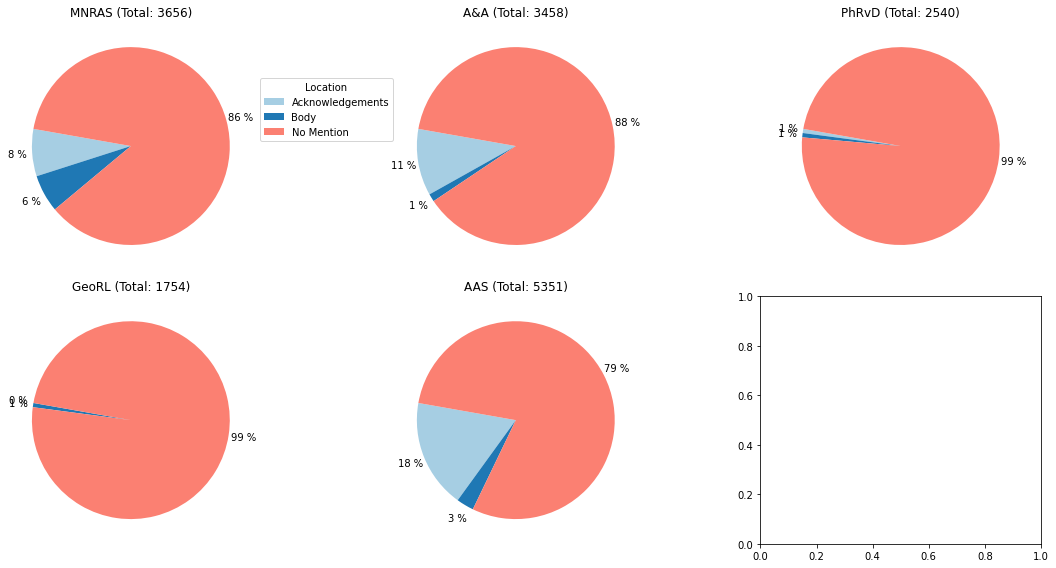

In [374]:
bib_lib_2024_df = bib_lib_df[(bib_lib_df['Year'] == 2024)]

aas_journals = ['ApJ', 'AJ', 'ApJS', 'ApJL']
tmp = bib_lib_2024_df[bib_lib_2024_df['Journal'].isin(aas_journals)].groupby(['Library','Where']).agg({'Count': 'sum'}).reset_index()
tmp['Journal'] = 'AAS'
tmp['Year'] = 2024
bib_lib_2024_df = pandas.concat([bib_lib_2024_df, tmp], ignore_index=True)
bib_lib_2024_df

# Filter data for 2024 and 'astropy'
astropy_2024 = bib_lib_2024_df[(bib_lib_2024_df['Library'] == 'numpy') & (bib_lib_2024_df['Year'] == 2024)]

# Merge with total_pubs_df to get the total counts for each journal
astropy_2024 = astropy_2024.merge(total_pubs_df[total_pubs_df['Year'] == 2024], on='Journal', suffixes=('', '_total'))

# Create a 3x2 grid for pie charts
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Plot pie charts for each journal
for i, journal in enumerate(astropy_2024['Journal'].unique()):
    journal_data = astropy_2024[astropy_2024['Journal'] == journal]
    journal_data[journal_data['Where'] == 'body']['Count'] = journal_data[journal_data['Where'] == 'body']['Count'] - journal_data[journal_data['Where'] == 'both']['Count']
    journal_data = journal_data[journal_data['Where'] != 'both']
    sizes = journal_data['Count'] / journal_data['Count_total']
    sizes = sizes.tolist()
    sizes.append(1 - sum(sizes))
    labels = journal_data['Where']
    labels = labels.tolist()
    labels.append('No Mention')
    total = journal_data['Count_total'].iloc[0]
    wedges, texts, autotexts = axes[i].pie(
        sizes, autopct=lambda p: f'{p:.0f} %', startangle=170, 
        colors=['#a6cee3', '#1f78b4', '#fb8072'], pctdistance=1.15
    )
    axes[i].set_title(f'{journal} (Total: {total})')
    if i == 0:  # Add legend to the first subplot
        axes[i].legend(wedges, ['Acknowledgements','Body','No Mention'], title="Location", loc="lower left", bbox_to_anchor=(1, 0.5))
    if i >= len(astropy_2024['Journal'].unique()):
        axes[i].axis('off')
# Adjust layout
plt.tight_layout()
plt.show()



In [175]:
encoded_query = urlencode({"q": "body:('transiting exoplanets' +JWST)",
                           "fl": "title,id, bibstem",
                           "rows": 3,
                           "hl": "true",
                           "hl.fl": "body",
                           "hl.snippets": 2,
                           "hl.fragsize": 100,"hl.maxAnalyzedChars":1000000
                          })
results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                       headers={'Authorization': 'Bearer ' + token})

results.json()

{'responseHeader': {'status': 0,
  'QTime': 123,
  'params': {'hl.snippets': '2',
   'q': "body:('transiting exoplanets' +JWST)",
   'hl': 'true',
   'hl.maxAnalyzedChars': '1000000',
   'fl': 'title,id,bibstem,publisher',
   'hl.fragsize': '100',
   'start': '0',
   'internal_logging_params': 'X-Amzn-Trace-Id=Root=1-67fe6e35-51337bd64478f3d2772d7d12',
   'hl.fl': 'body',
   'rows': '3',
   'hl.maxHighlightCharacters': '100',
   'wt': 'json'}},
 'response': {'numFound': 4750,
  'start': 0,
  'numFoundExact': True,
  'docs': [{'bibstem': ['arXiv', 'arXiv2105'],
    'id': '20116449',
    'title': ['Detectability of Artificial Lights from Proxima b']},
   {'bibstem': ['JATIS', 'JATIS...1'],
    'id': '1093212',
    'title': ['Transiting Exoplanet Survey Satellite (TESS)']},
   {'bibstem': ['ApJL', 'ApJL..956'],
    'id': '24110807',
    'title': ['Carbon-bearing Molecules in a Possible Hycean Atmosphere'],
    'publisher': 'IOP'}]},
 'highlighting': {'20116449': {}, '1093212': {}, '241108

In [244]:
encoded_query = urlencode({"q": "body:'astropy'",
                           "fq": "property:refereed AND database:astronomy AND year:2024 AND bibstem:GeoRL",
                           "fl": "bibcode, title, id, bibstem",
                           "rows": 1000,
                           "hl": "true",
                           "hl.fl": "body",
                           "hl.snippets": 4,
                           "hl.fragsize": 100,
                           "hl.maxAnalyzedChars":100000000
                          })
results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                       headers={'Authorization': 'Bearer ' + token})

results.json()['highlighting']
#data.append({'Year': year, 'Journal': bib, 'Count': num_found})

{'30743522': {}, '31609357': {}}

In [215]:
len(results.json()['highlighting'].items())

284

In [216]:
with open("highlighted_text_mnras_2024.txt", "w") as file:
    for key, value in results.json()['highlighting'].items():
        if 'body' in value:
            for i in range(len(value['body'])):
                file.write(str(i) + ". " + value['body'][i].replace('<em>','').replace('</em>','') + "\n")


/var/folders/hv/3h478c1n4mj5d4ktzyh_v_sh3cf0hx/T/ipykernel_937/3840770222.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  chart.figure.show()


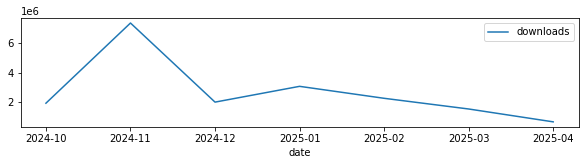

In [218]:
import pypistats
data = pypistats.overall("astropy", total='monthly', format="pandas")
data = data.groupby("category").get_group("without_mirrors").sort_values("date")

chart = data.plot(x="date", y="downloads", figsize=(10, 2))
chart.figure.show()
chart.figure.savefig("overall.png")

In [219]:
pypistats.overall?

Signature:
pypistats.overall(
    package: 'str',
    mirrors: 'bool | str | None' = None,
    **kwargs: 'str',
)
Docstring:
Retrieve the aggregate daily download time series with or without mirror
downloads
File:      ~/miniconda3/envs/fun_env/lib/python3.10/site-packages/pypistats/__init__.py
Type:      function


In [404]:
# with plt.xkcd():
#     plt.figure(figsize=(10, 1))
#     plt.xticks(range(2011, 2025), rotation=0)
#     plt.xlim(2010, 2025)
#     # Add an arrow at the end of the x-axis
#     plt.annotate('', xy=(2025, 0), xytext=(2024.5, 0),
#                  arrowprops=dict(facecolor='black', shrink=0.01, width=1, headwidth=8))
#     plt.gca().axes.get_yaxis().set_visible(False)  # Hide the y-axis
#     plt.gca().spines['top'].set_visible(False)    # Hide the top spine
#     plt.gca().spines['right'].set_visible(False)  # Hide the right spine
#     plt.gca().spines['left'].set_visible(False)   # Hide the left spine
#     plt.xlabel('Year')



#     plt.tight_layout()
#     #plt.show()
#     plt.savefig('xkcd_plot.png', dpi=300, bbox_inches='tight')

In [132]:
print(bibstems)

['ApJ', 'AJ', 'ApJS', 'ApJL', 'MNRAS', 'A&A', 'PASP']


In [225]:
astropy_pypi_downloads = {
    2016:79030,
    2017:165943,
    2018:376921,
    2019:1129174,
    2020:3221240,
    2021:4647076,
    2022:7172415,
    2023:7255821,
    2024:23595613
}

emcee_pypi_downloads = {
    2016:18908,
    2017:54038,
    2018:48810,
    2019:217860,
    2020:396829,
    2021:807400,
    2022:1095215,
    2023:1185438,
    2024:4574595
}

astroquery_pypi_downloads = {
    2016:5091,
    2017:8232,
    2018:19781,
    2019:84110,
    2020:167967,
    2021:207039,
    2022:300581,
    2023:388253,
    2024:1144235
}

photutils_pypi_downloads = {
    2016:3613,
    2017:6114,
    2018:13239,
    2019:48754,
    2020:97816,
    2021:134678,
    2022:183930,
    2023:351938,
    2024:702149
}

jwst_pypi_downloads = {
    2016:np.nan,
    2017:np.nan,
    2018:46,
    2019:187,
    2020:1073,
    2021:23499,
    2022:59104,
    2023:63345,
    2024:111996
}

In [230]:
data = [] 

for year in range(2011, 2025):
    for lib in ['astropy', 'emcee', 'astroquery', 'jwst', 'photutils']:
        for bib in bibstems:
            encoded_query = urlencode({"q": "ack:'{}' AND year:{}".format(lib, year),
                                    "fq": "property:refereed AND database:astronomy AND bibstem:{}".format(bib),
                                    "fl": "bibcode"
                                    })
            results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                headers={'Authorization': 'Bearer ' + token})
            num_found = results.json()['response']['numFound']
            data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Journal':bib, 'Where':'ack'})

            encoded_query = urlencode({"q": "body:'{}' AND year:{}".format(lib, year),
                                "fq": "property:refereed AND database:astronomy AND bibstem:{}".format(bib),
                                "fl": "bibcode"
                                    })
            results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                headers={'Authorization': 'Bearer ' + token})
            num_found = results.json()['response']['numFound']
            data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Journal':bib, 'Where':'body'})

            encoded_query = urlencode({"q": "body:'{}' AND ack:'{}' AND year:{}".format(lib, lib, year),
                                "fq": "property:refereed AND database:astronomy AND bibstem:{}".format(bib),
                                "fl": "bibcode"
                                    })
            results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query), \
                                headers={'Authorization': 'Bearer ' + token})
            num_found = results.json()['response']['numFound']
            data.append({'Year': year, 'Library': lib, 'Count': num_found, 'Journal':bib, 'Where':'both'})

# Convert the data to a DataFrame
astro_bib_lib_df = pandas.DataFrame(data)
print(astro_bib_lib_df)
astro_bib_lib_df.to_csv('astro_citations_by_lib_bib.csv')

# Group by Year and Library to calculate total counts across all journals
grouped_by_year = astro_bib_lib_df.groupby(['Year', 'Library']).agg({'Count': 'sum'}).reset_index()

# Print the grouped data
print(grouped_by_year)


      Year    Library  Count Journal Where
0     2011    astropy      0     ApJ   ack
1     2011    astropy      0     ApJ  body
2     2011    astropy      0     ApJ  both
3     2011    astropy      0      AJ   ack
4     2011    astropy      0      AJ  body
...    ...        ...    ...     ...   ...
1675  2024  photutils      0   PhRvD  body
1676  2024  photutils      0   PhRvD  both
1677  2024  photutils      0   GeoRL   ack
1678  2024  photutils      0   GeoRL  body
1679  2024  photutils      0   GeoRL  both

[1680 rows x 5 columns]
    Year     Library  Count
0   2011     astropy      0
1   2011  astroquery      0
2   2011       emcee      0
3   2011        jwst    143
4   2011   photutils      0
..   ...         ...    ...
65  2024     astropy   2942
66  2024  astroquery    168
67  2024       emcee   1691
68  2024        jwst   3190
69  2024   photutils    571

[70 rows x 3 columns]


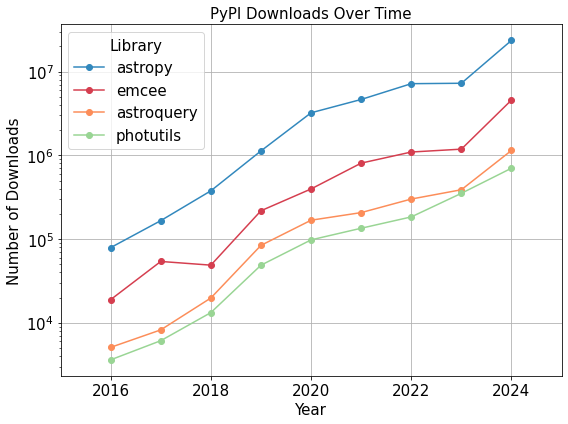

In [401]:
# Plot all the dictionaries in one plot
plt.figure(figsize=(8, 6))

astro_lib_colors = ['#3288bd','#d53e4f','#fc8d59','#e6f598','#99d594']

# Plot each dictionary
for lib_name, downloads,cc in zip(['astropy', 'emcee', 'astroquery', 'photutils'], #'jwst'
    [astropy_pypi_downloads, emcee_pypi_downloads, astroquery_pypi_downloads, photutils_pypi_downloads],[color for color in astro_lib_colors if color != '#e6f598']):
    years = list(downloads.keys())
    counts = list(downloads.values())
    plt.plot(years, counts, label=lib_name + 'downld', color=cc, marker='o')

# Plot the contents of the grouped_by_year dataframe
for library, cc in zip(['astropy', 'emcee', 'astroquery', 'jwst', 'photutils'], astro_lib_colors):
    library_data = grouped_by_year[grouped_by_year['Library'] == library]
    #plt.plot(library_data['Year'], library_data['Count'], label=f"{library} citation", linestyle='--', color=cc, marker='x')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Downloads', fontsize=15)
plt.yscale('log')
plt.xlim(2015, 2025)
plt.title('PyPI Downloads Over Time', fontsize=15)
plt.legend(title='Library', labels=['astropy', 'emcee', 'astroquery', 'photutils'], fontsize=15, title_fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

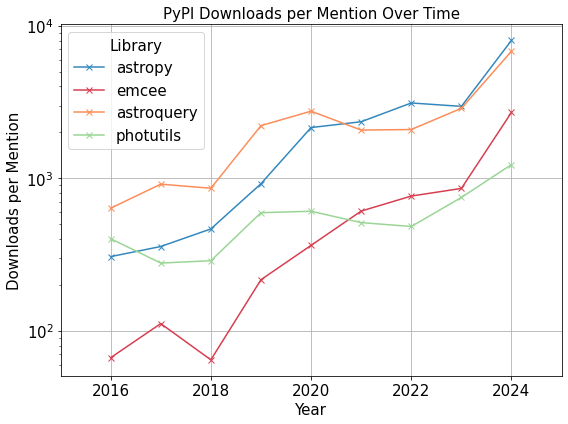

In [399]:
grouped_by_year = grouped_by_year[grouped_by_year['Year'] > 2015]

# Plot all the dictionaries in one plot
plt.figure(figsize=(8, 6))

# Plot each dictionary
for lib_name, downloads, cc in zip(
    ['astropy', 'emcee', 'astroquery', 'photutils'], #'jwst'
    [astropy_pypi_downloads, emcee_pypi_downloads, astroquery_pypi_downloads, photutils_pypi_downloads],
    [color for color in astro_lib_colors if color != '#e6f598']):
    years = list(downloads.keys())
    counts = list(downloads.values())
    library_data = grouped_by_year[grouped_by_year['Library'] == lib_name]
    plt.plot(library_data['Year'], [c / m if m > 0 else 0 for c, m in zip(counts, library_data['Count'])], label=f"{lib_name}", color=cc, marker='x')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=15)
plt.ylabel('Downloads per Mention', fontsize=15)
plt.yscale('log')
plt.xlim(2015, 2025)
plt.title('PyPI Downloads per Mention Over Time', fontsize=15)
plt.legend(title='Library', fontsize=15, title_fontsize=15)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

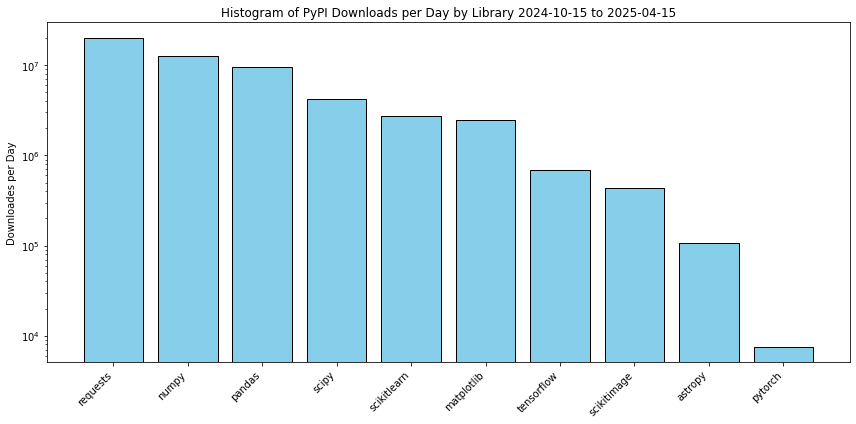

In [400]:
days = 182
requests = 3672792748
pytorch = 1369651
tensorflow = 126933043
scikitimage = 78215727
scikitlearn = 493628681
pandas = 1749108037
scipy = 763011745
matplotlib = 451645511
numpy =  2321360359
astropy = 19358594

# Create a dictionary of the data
data = {
    'requests': requests / days,
    'pytorch': pytorch / days,
    'tensorflow': tensorflow / days,
    'scikitimage': scikitimage / days,
    'scikitlearn': scikitlearn / days,
    'pandas': pandas / days,
    'scipy': scipy / days,
    'matplotlib': matplotlib / days,
    'numpy': numpy / days,
    'astropy': astropy / days
}

# Sort the data by size
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(sorted_data.keys(), sorted_data.values(), color='skyblue', edgecolor='black')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Downloades per Day')
plt.title('Histogram of PyPI Downloads per Day by Library 2024-10-15 to 2025-04-15')
plt.tight_layout()
plt.show()